In [13]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from scipy.stats import linregress
#print("imported")

#Kept all independent for this code 

%reset -f
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics

In [14]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/frank_hertz_exp.xlsx')
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
88    88    10.43
89    89    11.30
90    90    11.95
91    91    12.33
92    92    12.34

[93 rows x 2 columns]


In [15]:
VG2K=df['VG2K'].to_numpy()
current=df['CURRENT'].to_numpy()

del_VG2k=0.01 # least count uncertinity in VG2K
del_current=0.01 # least count uncertinity in current.


/home/ashwin/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/ashwin/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


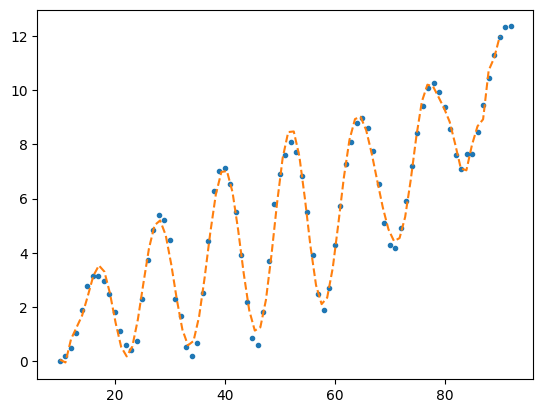

In [16]:



x=VG2K[10:]
y=current[10:]
deg=100

result=np.polyfit(x,y,deg)


p = np.poly1d(result)

xp = np.linspace(10, 90, 80)
plt.plot(x, y, '.', xp, p(xp),'--')

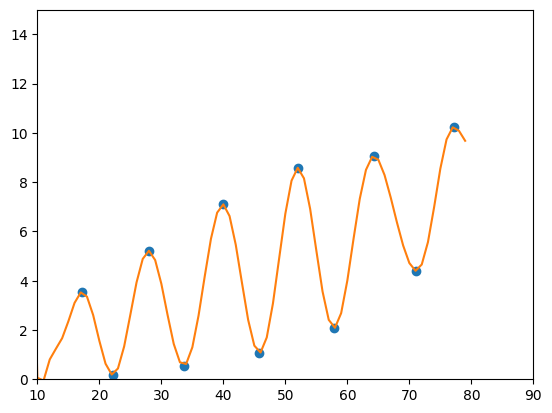

In [17]:

crit = p.deriv().r
r_crit = crit[crit.imag==0].real
test = p.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
x_min = r_crit
x_min=x_min[::-1]
x_min=x_min[1:-1]

y_min = p(x_min)
plt.plot( x_min, y_min, 'o' )

xc = np.arange(0, 80, 1)
yc = p(xc)
plt.plot( xc, yc)
plt.xlim([10,90])
plt.ylim([0,15])

plt.show()

In [18]:
print(x_min)

[17.23911652 22.15519075 27.96228669 33.59206254 39.91309024 45.81703246
 52.04796492 57.84582317 64.29750051 71.09499682 77.18592894]


In [19]:
#x_min=[19.5,25.0,31.1,36.8,42.8,48.0,54.3,59.8,66.2,71.9,78.6,84.5]

In [20]:
diff=[]
for i in range(1,len(x_min)-2):
    diff.append(abs(x_min[i]-x_min[i+2]))
print(diff)

[11.436871793739602, 11.950803549015085, 12.224969916135805, 12.134874674106506, 12.028790708033476, 12.249535594849483, 13.249173656124348, 12.888428431932113]


In [21]:
statistics.stdev(diff)

0.5626607131491435

In [26]:
statistics.pstdev(diff)

0.5263209034004965

In [27]:
statistics.variance(diff)

0.31658707812150266

In [22]:
statistics.mean(diff)

12.270431040492053

In [23]:
print(diff)

[11.436871793739602, 11.950803549015085, 12.224969916135805, 12.134874674106506, 12.028790708033476, 12.249535594849483, 13.249173656124348, 12.888428431932113]


In [25]:
print((statistics.mean(diff)-11.83)/11.83*100)

3.7230011875913154
